In [1]:
import os
import sys 
import glob
import dask
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr

import cmcrameri.cm as cmc
import drama.utils as drtls
from drama.performance.sar.antenna_patterns import sinc_bp, phased_array

from dataclasses import dataclass
from typing import Callable, Union, List, Dict, Any
from leakage.velocity_leakage import S1DopplerLeakage, add_dca_to_leakage_class
from leakage.misc import round_to_hour, angular_difference, calculate_distance

In [2]:
data_dir = "/Users/opodriscoll/Documents/Data/Sentinel1/IW/"
data_dir_dca = "/Users/opodriscoll/Documents/Data/Sentinel1/DCA/"

scenarios = [
    'Aghulas_20200309',
    'Aghulas_20200321',
    'Aghulas_20200402',
    'Aghulas_20200414',
    'Aghulas_20200426'
    ]

Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Aghulas_20200309/0D9A_2A1B_4B1D_63F6_9B2F_FAFB_res300.nc
2020-03-09 17:33:01.542516
Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Aghulas_20200321/0407_0528_2434_7A73_BC55_E4A7_res300.nc
2020-03-21 17:33:51.714088
Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Aghulas_20200402/6711_9DCB_A4DE_E160_E5C6_FD45_res300.nc
2020-04-02 17:32:32.916929
Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Aghulas_20200414/1D90_53E2_5873_AD57_BF28_D8EC_res300.nc
2020-04-14 17:32:33.303853
Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Aghulas_20200426/1BD9_4FDB_70EB_7666_DC9A_E3C8_res300.nc
2020-04-26 17:33:52.842616


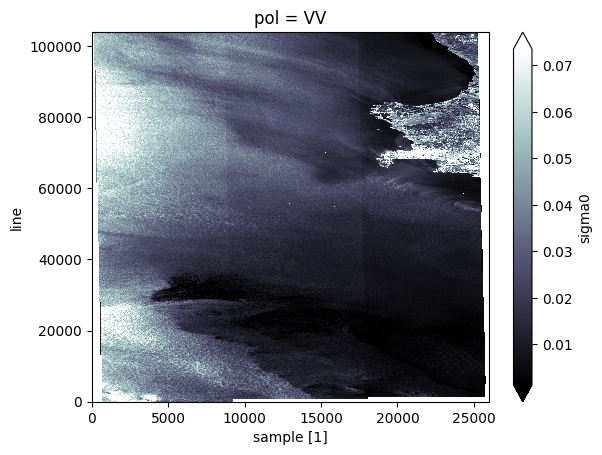

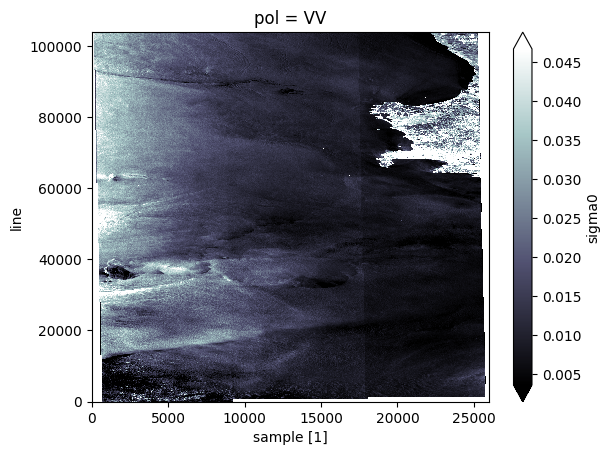

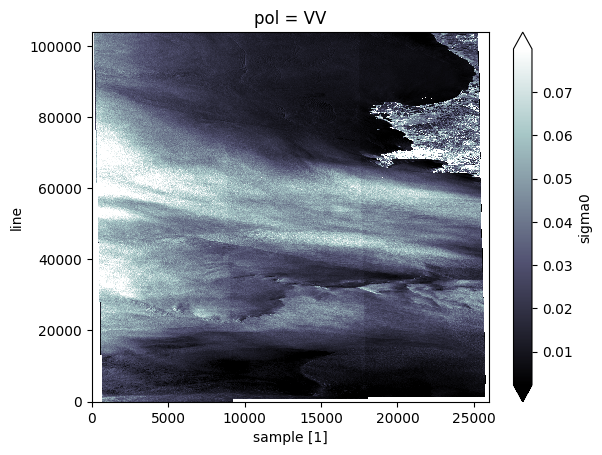

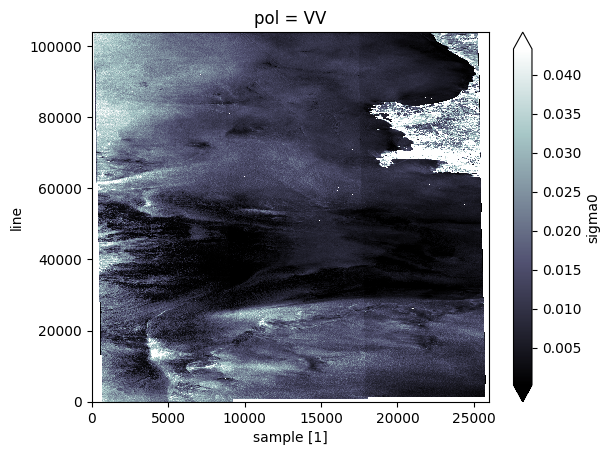

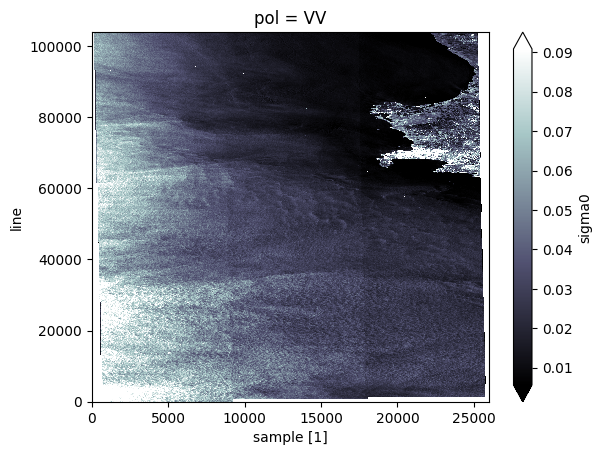

In [7]:
for scenario in scenarios:
    files = glob.glob(f"{data_dir+scenario}/*.SAFE")

    test = S1DopplerLeakage(
        filename=files,
        f0 = 5_400_000_000,
        z0 = 823_000,
        era5_directory='../../data/leakage/era5_winds/',
        resolution_product=25_000,
        az_footprint_cutoff=80_000,
        vx_sat=6_800,
        PRF=4,
        grid_spacing=300,
        antenna_length=2.87,
        antenna_height=0.32,
        beam_pattern= 'phased_array', #'phased_array', sinc
        antenna_elements=4,
        antenna_weighting=0.75,
        swath_start_incidence_angle_scat=45,
        boresight_elevation_angle_scat=40,
        random_state = 42,
        fill_nan_limit = None,

        # era5_smoothing_window=30,
        # denoise = True,
        # _pulsepair_noise = True
        # _speckle_noise= True
        )

    test.open_data()
    plt.figure()
    test.S1_file.sigma0.plot(robust = True, cmap = 'bone')
    print(test.S1_file.attrs['start_date'])